In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Load data
rawdata = pd.read_csv("/home/jovyan/479/479pricinganalytics/Week1/week1exerciserawdata.csv")
rawdata

,Customer,WTP
0,1,9500
1,2,7871
2,3,10407
3,4,12127
4,5,11996
...,...,...
995,996,10423
996,997,9563
997,998,10805
998,999,10958


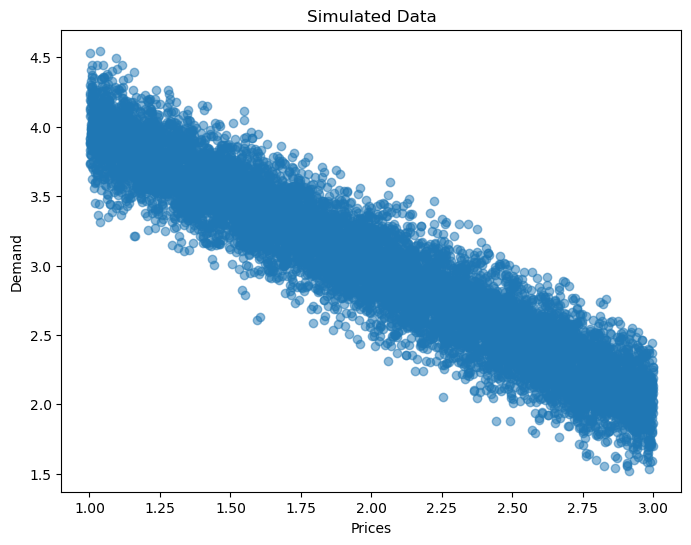

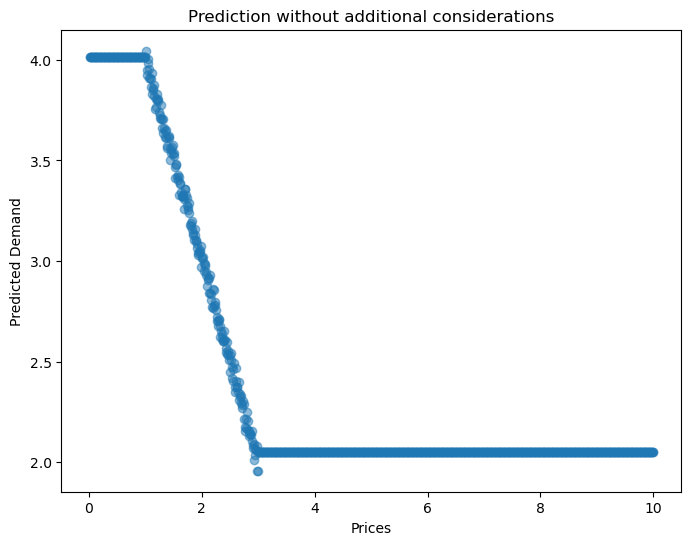

In [4]:
# Set costs
cost = 1

# Simulate some demand data
n = 10000
prices = cost + 2 * np.random.uniform(size=n)
noise = np.random.normal(loc=0, scale=0.2, size=n)
demand = 5 - prices + noise

df = pd.DataFrame({
    'prices': prices,
    'demand': demand
})

# Plot simulated data
plt.figure(figsize=(8, 6))
plt.scatter(df['prices'], df['demand'], alpha=0.5)
plt.title('Simulated Data')
plt.xlabel('Prices')
plt.ylabel('Demand')
plt.show()

# Prepare data for XGBoost
dtrain = xgb.DMatrix(data=df[['prices']], label=df['demand'])

# Set up parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'verbosity': 0
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Now do some out of sample prediction
predict_df = pd.DataFrame({'prices': np.arange(1, 1001) / 100})
dtest = xgb.DMatrix(predict_df)
predict_df['predicted_demand'] = bst.predict(dtest)

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(predict_df['prices'], predict_df['predicted_demand'], alpha=0.5)
plt.title('Prediction without additional considerations')
plt.xlabel('Prices')
plt.ylabel('Predicted Demand')
plt.show()

Case Study 1: Du Pont pricing Alathon 25
In 1995, Du Pont introduced Alathron 25, a revolutionary new polyethylene resin. Alathron 25 is designed to manufacture flexible irrigation pipes. These are under-ground pipe installed in large farms for automated irrigation (similar to household sprinkler systems). An example of an installed pipe is shown in figure below.

The current industry standard for irrigation pipes are traditional “off-grade” resin. The leading manufacturer of these pipes is Ridgeline, they charge $10 per pipe . A common complaint about these pipes are that they have a high failure rate (normally a leak). Once a failure in detected, the farmer must replace the pipe. The estimated labor cost to replace a failed pipe is $60 (in addition to the cost of replacing the pipe). However, since these pipes are installed underground a failure may not be immediately detected. This can lead to damaged crops. Interviews with farmers suggest that about one in five failures result in damaged crops, on average these cost the farmers an additional loss of $70.

The main technical advantages of polyethylene resin are a low melt index and intermediate crystallinity. As a result, the pipes have improved flexibility and more resistant to environmental stress cracks. To understand scale of these advantages, Du Pont commissioned a study to test the performance relative to Rigeline pipes. The results are shown the table below:

Resin used Failure Rate (% of installed pipes that fail in lifetime)

Alathon 25: 5%
Off grade Resin: 10%
Estimate the farmer’s willingness to pay of the new Alathron 25 pipes?

Off-Grade Resin Pipes:

Initial Cost: $10 per pipe
Failure Rate: 10%
Replacement Cost (Pipe + Labor): $70 per failure
Expected Crop Damage Cost per Pipe: $1.40 (from the corrected calculation)
Expected Cost Per Pipe (excluding initial cost):
Failure-related costs: 10% * $70 = $7
Total expected additional costs per pipe = $7 (failure costs) + $1.40 (crop damage) = $8.40
Total Cost for Off-Grade Resin Pipes: $10 (initial cost) + $8.40 (expected additional costs) = $18.40 per pipe

Alathron 25 Pipes:

Failure Rate: 5%
Replacement Cost (Pipe + Labor): $70 per failure (same as off-grade)
Expected Crop Damage Cost per Pipe: $0.70 (from the corrected calculation)
Expected Cost Per Pipe (excluding initial cost):
Failure-related costs: 5% * $70 = $3.50
Total expected additional costs per pipe = $3.50 (failure costs) + $0.70 (crop damage) = $4.20

In [4]:
# calculate the expected crop damage cost per pipe
expected_crop_damage_off_grade = 0.10 * 0.20 * 70
expected_crop_damage_alathron = 0.05 * 0.20 * 70

# calculate the expected total cost per pipe including initial cost, failure-related costs, and crop damage costs
# For off-grade resin pipes
failure_costs_off_grade = 0.10 * 70
total_expected_costs_off_grade = 10 + failure_costs_off_grade + expected_crop_damage_off_grade

# For Alathron 25 pipes
failure_costs_alathron = 0.05 * 70
# Assuming the initial cost for Alathron 25 would be higher, we initially ignore it to find the willingness to pay
total_expected_additional_costs_alathron = failure_costs_alathron + expected_crop_damage_alathron


expected_crop_damage_off_grade, expected_crop_damage_alathron

(1.4000000000000004, 0.7000000000000002)

In [3]:
# Total cost for using off-grade resin pipes
total_cost_off_grade_corrected = 18.40

# Total expected additional costs for using Alathron 25 pipes, calculated previously
total_expected_additional_costs_alathron_corrected = 4.20

# The initial cost of Alathron 25 pipes that would make their total cost equal to the total expected cost of off-grade resin pipes
# is the willingness to pay, calculated by the difference between the total cost of off-grade pipes and the expected additional costs of Alathron 25 pipes.
willingness_to_pay_alathron_final = total_cost_off_grade_corrected - total_expected_additional_costs_alathron_corrected
willingness_to_pay_alathron_final

14.2

In [ ]:
#figure out evc

Case Study 2: Pricing Plavix [IN CLASS]
You the pricing manager for Plavix (clipidogrel) that is used as an alternative for Asprin as a oral blood thinner for patients who are risk for clinical thrombotic events. These include vascular death, myocardial infection, stoke and hospitalization.

Based on the American Heart Association (https://healthmetrics.heart.org/wp-content/uploads/2017/06/Heart-Disease-and-Stroke-Statistics-2017-ucm_491265.pdf). Cardiovascular disease, listed as the underlying cause of death, accounts for nearly 801,000 deaths in the US. That is about 1 of every 3 deaths in the US. About 100 million American adults are living with some form of cardiovascular disease or the after-effects of stroke. About 5% of the possible patients have had been treated with cardiac surgery.

To access the efficacy of these drugs you R&D team has provided you two large-scale clinical studies that compare these two drugs. The first (see clinical study #1) considers all 100 million patients and the second (see clinical study #2) considers patients who had a previous cardiac surgery. In each study, the groups were given 1 does of either Asprin or Plavix daily for 3 years or about 1,000 pills.

Your R&D group summarizes the studies as:

summary of negative outcomes
population	with Plavix	with Asprin
All patients	5.3%	5.8%
Patients with prior surgery	15.9%	22.3%
(Calculated) Patients without prior surgery	4.7%	4.9%
The average cost to a hospital of a negative outcome is estimated to be $100,000. The current price of Asprin is 1c per pill (or with 1,000 pills per treatment is $10).

What retail price would you set for a pill of Plavix?

a. For All Patients:
- Negative outcomes with Plavix: 5.3%
- Negative outcomes with Aspirin: 5.8%
- Difference in negative outcomes: 5.8% - 5.3% = 0.5%
- Expected savings per patient (avoided costs): 0.5% of $100,000 = $500

b. For Patients with Prior Surgery:
- Negative outcomes with Plavix: 15.9%
- Negative outcomes with Aspirin: 22.3%
- Difference in negative outcomes: 22.3% - 15.9% = 6.4%
- Expected savings per patient (avoided costs): 6.4% of $100,000 = $6,400

c. For Patients Without Prior Surgery:
Using the calculated figures for negative outcomes:
- With Plavix: 4.7%
- With Aspirin: 4.9%
- Difference in negative outcomes: 4.9% - 4.7% = 0.2%
- Expected savings per patient (avoided costs): 0.2% of $100,000 = $200

In [26]:
# evc per patient
evc_all_patients = 510  
evc_prior_surgery = 6410  
evc_no_surgery = 210  

# number of patients with surgery and without
demand_all_patients = 100000000
demand_prior_surgery = 5000000
demand_no_surgery = 15000000

#revenue
revenue_all_patients = 51000000
revenue_prior_surgery = 32050000
revenue_no_surgery = 21000000

# Calculate Total Economic Value (TEV) for each group
tev_all_patients = evc_all_patients * demand_all_patients
tev_prior_surgery = evc_prior_surgery * demand_prior_surgery
tev_no_surgery = evc_no_surgery * demand_no_surgery

# Calculate the proportion of TEV captured as revenue for each group
revenue_proportion_all_patients = revenue_all_patients / tev_all_patients
revenue_proportion_prior_surgery = revenue_prior_surgery / tev_prior_surgery
revenue_proportion_no_surgery = revenue_no_surgery / tev_no_surgery

(tev_all_patients, tev_prior_surgery, tev_no_surgery, revenue_proportion_all_patients, revenue_proportion_prior_surgery, revenue_proportion_no_surgery)

(51000000000, 32050000000, 3150000000, 0.001, 0.001, 0.006666666666666667)